# 01 - Data Preprocessing

## A - Libraries

In [1]:
from metaboDGD.util import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## B - Retrieving Separate Datasets

In [2]:
df, cohorts = data.combine_cohort_datasets()

In [10]:
np_df = df.T.to_numpy()
np_df_zm = (np_df == 0)
np_exp = np.exp2(np_df)
np_exp[np_df_zm] = 0.0
print(np_exp.mean(axis=0))
print(np_exp.var(axis=0))
print(np_df.shape)

[9.94929830e+04 8.77717178e+04 1.93487039e+04 ... 6.67444556e-02
 1.47010159e-01 6.79317941e+04]
[1.96536726e+10 3.27654209e+10 4.79041403e+09 ... 4.07762590e-02
 2.16821863e-01 4.43175904e+10]
(224, 1915)


In [36]:
sample = np_df[0]
zero_mask = (sample == 0)
nonzero_mask = ~(zero_mask)

(array([218.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   2.,   1.]),
 array([     0.        ,  37877.98342333,  75755.96684665, 113633.95026998,
        151511.93369331, 189389.91711663, 227267.90053996, 265145.88396329,
        303023.86738661, 340901.85080994, 378779.83423326]),
 <BarContainer object of 10 artists>)

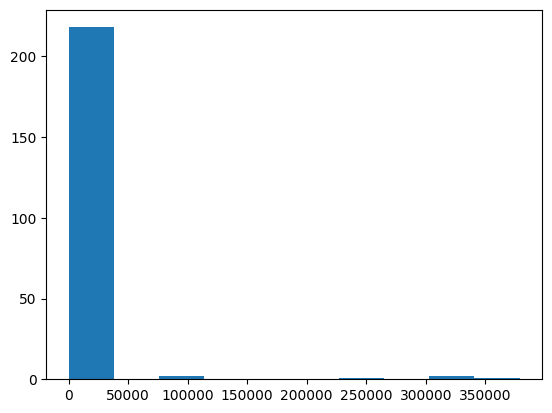

In [41]:
plt.hist(np_exp[:, 400])

In [55]:
import torch
import torch.distributions as D

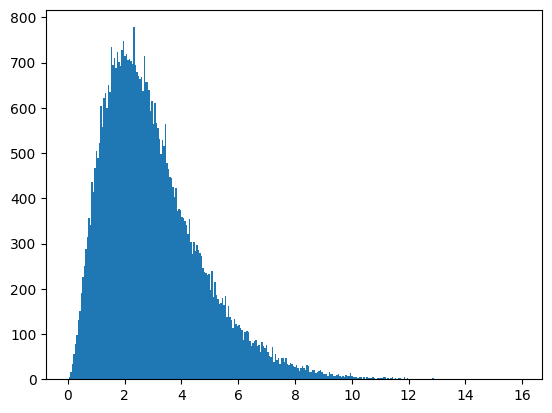

In [ ]:
# test = torch.rand((10,))
# # test[5] = 0.0
# # test[~(test == 0)] = 999.99
# # test
# torch.zeros_like(test)

# gamma_dist = D.Gamma(torch.full(fill_value=3.0, size=(1,)),
#                      torch.full(fill_value=1.0, size=(1,)))
# plt.hist(gamma_dist.sample(sample_shape=(50000,)).squeeze().numpy(), bins=300)
# plt.show()

In [76]:
torch.exp(gamma_dist.log_prob(torch.full(fill_value=1e-5, size=(1,10))))

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000]])

In [74]:
gamma_dist.cdf(torch.full(fill_value=1e-5, size=(1,10)))

tensor([[1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
         1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05]])

In [35]:
np.count(np_exp.var(axis=0) > np_exp.mean(axis=0))

AttributeError: module 'numpy' has no attribute 'count'

Text(0.5, 1.0, 'Mean-Variance Plot')

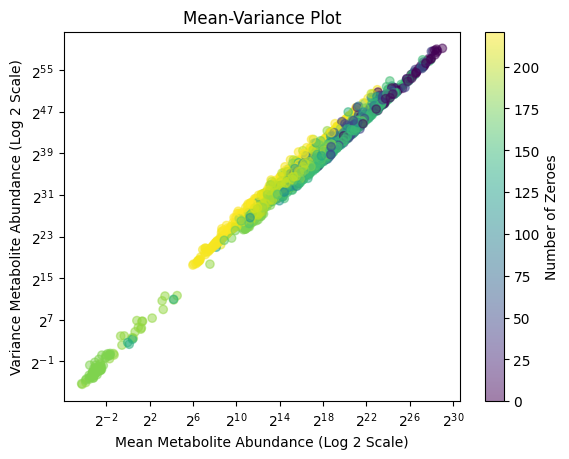

In [31]:
## DO NOT REMOVE
zero_counts = np.count_nonzero(np_exp == 0, axis=0)
plt.scatter(x=np_exp.mean(axis=0),
            y=np_exp.var(axis=0),
            c=zero_counts,
            cmap='viridis',
            marker='o',
            alpha=0.5)
plt.xlabel("Mean Metabolite Abundance (Log 2 Scale)")
plt.ylabel("Variance Metabolite Abundance (Log 2 Scale)")
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.colorbar(label='Number of Zeroes')
plt.title("Mean-Variance Plot")

In [53]:
type(np_df == 0)

numpy.ndarray

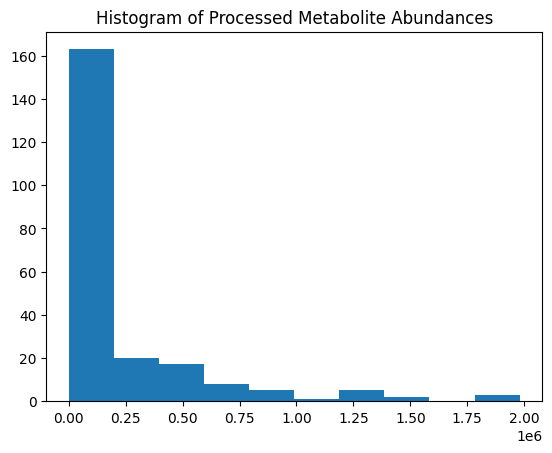

In [50]:
## DO NOT REMOVE
plt.hist(
    np_exp[:,100],
)
plt.title("Histogram of Processed Metabolite Abundances")
plt.show()

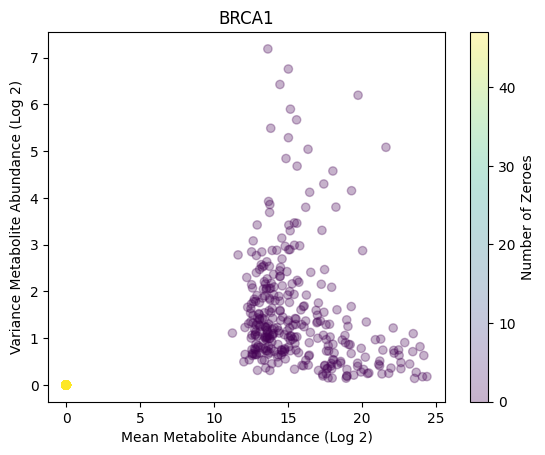

In [7]:
# BRCA1 ccRCC3  ccRCC4  COAD    GBM HurthleCC   PDAC    PRAD
target_cohort = "BRCA1"
START_IDX = len(cohorts["ccRCC3"]['sample_list']) * 0
END_IDX = len(cohorts[target_cohort]['sample_list'])
cohort_df = np_df[START_IDX:START_IDX+END_IDX]
zero_counts = np.count_nonzero(cohort_df == 0, axis=0)

plt.scatter(x=cohort_df.mean(axis=0),
            y=cohort_df.var(axis=0),
            c=zero_counts,
            cmap='viridis',
            marker='o',
            alpha=0.3)
plt.xlabel("Mean Metabolite Abundance (Log 2)")
plt.ylabel("Variance Metabolite Abundance (Log 2)")
plt.title(target_cohort)
plt.colorbar(label='Number of Zeroes')

In [5]:
# Gets the indices of the 26 metabolites present across all samples (26)
# set([x for x in range(0,1915)]) - set(np.unique(np.where(np_df == 0)[1]))

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
np_df = df.T.to_numpy()
pca_model = PCA(n_components=2)
results = pca_model.fit_transform(np_df)

plt.scatter(results[0:47,0], results[0:47, 1], c='red'          ,label="BRCA1")
plt.scatter(results[47:86,0], results[47:86, 1], c='orange'     ,label="COAD")
plt.scatter(results[86:133,0], results[86:133, 1], c='yellow'   ,label="ccRCC3")
plt.scatter(results[133:157,0], results[133:157, 1], c='green'  ,label="ccRCC4")
plt.scatter(results[157:163,0], results[157:163, 1], c='blue'   ,label="GBM")
plt.scatter(results[163:166,0], results[163:166, 1], c='purple' ,label="HurthleCC")
plt.scatter(results[166:178,0], results[166:178, 1], c='pink'   ,label="PDAC")
plt.scatter(results[178:224,0], results[178:224, 1], c='black'  ,label="PRAD")
plt.legend()
plt.show()

In [ ]:
np_df.shape

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8)
gmm = gmm.fit(np_df)

In [ ]:
results = gmm.sample(n_samples=1000)

In [ ]:
import pandas as pd
pd.Series(results[1]).value_counts()

In [ ]:
pca_new = PCA(n_components=2)
results_new = pca_model.transform(results[0])
# results_new = pca_model.transform(results[0])
# plt.scatter(results_new[0:224,0]   , results_new[0:224, 1], c='red'          ,label="BRCA1")
# plt.scatter(results_new[224:426,0]  , results_new[224:426, 1], c='orange'     ,label="COAD")
# plt.scatter(results_new[426:609,0] , results_new[426:609, 1], c='yellow'   ,label="ccRCC3")
# plt.scatter(results_new[609:785,0], results_new[609:785, 1], c='green'  ,label="ccRCC4")
# plt.scatter(results_new[785:903,0], results_new[785:903, 1], c='blue'   ,label="GBM")
# plt.scatter(results_new[903:956,0], results_new[903:956, 1], c='purple' ,label="HurthleCC")
# plt.scatter(results_new[956:983,0], results_new[956:983, 1], c='pink'   ,label="PDAC")
plt.scatter(results_new[983:1000,0], results_new[983:1000, 1], c='black'  ,label="PRAD")
plt.legend()
plt.show()

In [ ]:
# pca_new = PCA(n_components=2)
results_new = pca_model.transform(results[0])
# plt.scatter(results_new[0:47,0]   , results_new[0:47, 1], c='red'          ,label="BRCA1")
# plt.scatter(results_new[47:86,0]  , results_new[47:86, 1], c='orange'     ,label="COAD")
# plt.scatter(results_new[86:133,0] , results_new[86:133, 1], c='yellow'   ,label="ccRCC3")
# plt.scatter(results_new[133:157,0], results_new[133:157, 1], c='green'  ,label="ccRCC4")
# plt.scatter(results_new[157:163,0], results_new[157:163, 1], c='blue'   ,label="GBM")
# plt.scatter(results_new[163:166,0], results_new[163:166, 1], c='purple' ,label="HurthleCC")
# plt.scatter(results_new[166:178,0], results_new[166:178, 1], c='pink'   ,label="PDAC")
# plt.scatter(results_new[178:224,0], results_new[178:224, 1], c='black'  ,label="PRAD")
plt.legend()
plt.show()

In [ ]:
# Get the xls file
cohort_name = "PRAD"
xls = pd.ExcelFile(f'data/PreprocessedData_{cohort_name}.xlsx')

# Get the dataframes for the preprocessed metabolomics data
# t = xls.parse("metabo_imputed_filtered_Tumor")
n = xls.parse("metabo_imputed_filtered_Normal")

# Replace IDs of the dataframes
# t.rename({"Unnamed: 0": "t_met"}, inplace=True, axis=1)
n.rename({"Unnamed: 0": "n_met"}, inplace=True, axis=1)

# Get list of metabolites
# t_list = t["t_met"].to_list()
n_list = n["n_met"].to_list()
# met_list = list(set(t_list) | set(n_list))

# Create a dictionary of the metabolite names and HMDB IDs
###########
# 05/25/25 - Eliminated HMDB IDs use because only 72% of the features have HMDB IDs across all cohorts
# For Reference:
#           TOTAL_FEATURES  TOTAL_FEATURES_WITH_HMDB_IDS
# BRCA1     324             215
# COAD      160	            141
# ccRCC3    727	            551
# ccRCC4    951	            701
# GBM       704	            357
# HurthleCC 668	            523
# PDAC      325	            279
# PRAD      382	            320
###########
# metanno = xls.parse("metanno")
# metanno_dict = metanno.set_index("H_name")["H_HMDB"].to_dict()
# hmdb_list = set(metanno.loc[metanno["H_name"].isin(n_list)]["H_HMDB"].tolist()


# Get dataframe with only sorted shared metabolites
# t_shared = t[t["t_met"].isin(met_list)]
# t_shared.sort_values("t_met", ignore_index=True, inplace=True)
# n_shared = n[n["n_met"].isin(met_list)]
# n_shared.sort_values("n_met", ignore_index=True, inplace=True)
# merged = pd.concat([t_shared, n_shared], axis=1)

# n = n.set_index(n["n_met"])
n_no_labels = n.drop(labels=['n_met'], axis=1)
print(n.set_index("n_met"))